# NLP

In [1]:
import sys
sys.version

'3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]'

In [2]:
#from konlpy import init_jvm

from konlpy.tag import Kkma

import os
java_home = os.environ['JAVA_HOME']

kkma = Kkma()

In [3]:
kkma.sentences('한국어 분석을 시작합니다 재미있어요~~')

['한국어 분석을 시작합니다', '재미있어요~~']

In [4]:
kkma.nouns('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석']

In [5]:
kkma.pos('한국어 분석을 시작합니다 재미있어요~~')

[('한국어', 'NNG'),
 ('분석', 'NNG'),
 ('을', 'JKO'),
 ('시작하', 'VV'),
 ('ㅂ니다', 'EFN'),
 ('재미있', 'VA'),
 ('어요', 'EFN'),
 ('~~', 'SW')]

In [6]:
from konlpy.tag import Hannanum
hannanum = Hannanum()

In [7]:
hannanum.nouns('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석', '시작']

In [8]:
hannanum.morphs('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석', '을', '시작', '하', 'ㅂ니다', '재미있', '어요', '~~']

In [9]:
hannanum.pos('한국어 분석을 시작합니다 재미있어요~~')

[('한국어', 'N'),
 ('분석', 'N'),
 ('을', 'J'),
 ('시작', 'N'),
 ('하', 'X'),
 ('ㅂ니다', 'E'),
 ('재미있', 'P'),
 ('어요', 'E'),
 ('~~', 'S')]

In [10]:
from konlpy.tag import Twitter
t = Twitter()

C:\Users\bitcamp\anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [11]:
t.nouns('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석', '시작']

In [12]:
t.morphs('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석', '을', '시작', '합니다', '재미있어요', '~~']

In [13]:
t.pos('한국어 분석을 시작합니다 재미있어요~~')

[('한국어', 'Noun'),
 ('분석', 'Noun'),
 ('을', 'Josa'),
 ('시작', 'Noun'),
 ('합니다', 'Verb'),
 ('재미있어요', 'Adjective'),
 ('~~', 'Punctuation')]

# 워드 클라우드

In [19]:
from wordcloud import WordCloud, STOPWORDS

import numpy as np
from PIL import Image

In [21]:
import os

print(os.getcwd())

text = open('./data/NLP_data/09. alice.txt').read()
alice_mask = np.array(Image.open('./data/NLP_data/09. alice_mask.png'))

stopwords = set(STOPWORDS)
stopwords.add('said')

C:\Users\bitcamp


In [22]:
import matplotlib.pyplot as plt
import platform

path = 'c:/Windows/Fonts/malgun.ttf'
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')
    
%matplotlib inline

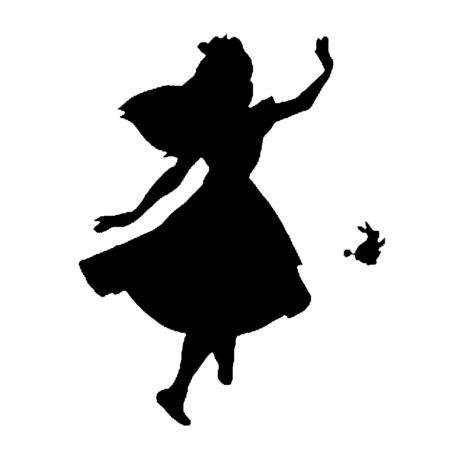

In [24]:
plt.figure(figsize=(8,8))
plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

In [25]:
wc = WordCloud(background_color='white', max_words=2000, mask=alice_mask,
              stopwords = stopwords)
wc = wc.generate(text)
wc.words_

{'Alice': 1.0,
 'little': 0.29508196721311475,
 'one': 0.27595628415300544,
 'know': 0.2459016393442623,
 'went': 0.226775956284153,
 'thing': 0.2185792349726776,
 'time': 0.2103825136612022,
 'Queen': 0.20765027322404372,
 'see': 0.1830601092896175,
 'King': 0.17486338797814208,
 'well': 0.1721311475409836,
 'now': 0.16393442622950818,
 'head': 0.16393442622950818,
 'began': 0.15846994535519127,
 'way': 0.1557377049180328,
 'Hatter': 0.1557377049180328,
 'Mock Turtle': 0.15300546448087432,
 'say': 0.15027322404371585,
 'Gryphon': 0.15027322404371585,
 'think': 0.1448087431693989,
 'quite': 0.14207650273224043,
 'much': 0.13934426229508196,
 'first': 0.13934426229508196,
 'thought': 0.1366120218579235,
 'go': 0.1366120218579235,
 'come': 0.13114754098360656,
 'never': 0.1284153005464481,
 'voice': 0.12568306010928962,
 'looked': 0.12295081967213115,
 'got': 0.12295081967213115,
 'must': 0.12021857923497267,
 'Cat': 0.12021857923497267,
 'Duchess': 0.11475409836065574,
 'Mouse': 0.11202

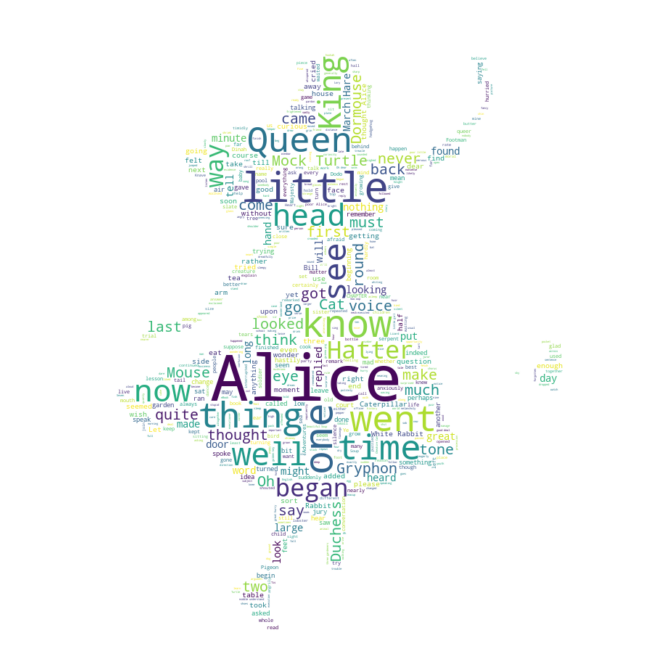

In [26]:
plt.figure(figsize=(12,12))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [27]:
text = open('./data/NLP_data/09. a_new_hope.txt').read()
text = text.replace('HAN', 'Han')
text = text.replace("LUKE'S", 'Luke')

mask = np.array(Image.open('./data/NLP_data/09. stormtrooper_mask.png'))

In [28]:
stopwords = set(STOPWORDS)
stopwords.add('int')
stopwords.add('ext')

In [29]:
wc = WordCloud(max_words=1000, mask=mask, stopwords=stopwords,
              margin=10, random_state=1).generate(text)

default_colors = wc.to_array()

In [30]:
import random
def gray_color_func(word, font_size, position, orientation,
                   random_state=None, **kwargs):
    return 'hsl(0, 0%%, %d%%)' % random.randint(60,100)

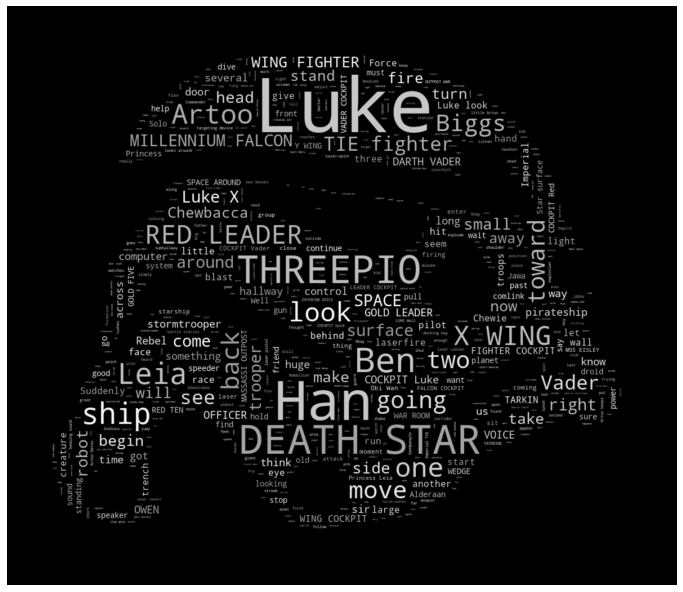

In [31]:
plt.figure(figsize=(12,12))
plt.imshow(wc.recolor(color_func=gray_color_func, random_state=3),
          interpolation='bilinear')
plt.axis('off')
plt.show()

# 육아휴직관련 법안 대한민국 국회 제 1809890호 의안

In [33]:
import nltk

In [36]:
from konlpy.corpus import kobill
files_ko = kobill.fileids()
doc_ko = kobill.open('1809890.txt').read()

In [45]:
# doc_ko

In [40]:
# from konlpy.tag import Twitter; t = Twitter()
# tokens_ko = t.nouns(doc_ko)
# tokens_ko

In [41]:
ko = nltk.Text(tokens_ko, name='대한민국 국회 의안 제 1809890호')

In [42]:
print(len(ko.tokens))    # returns number of tokens (document length)
print(len(set(ko.tokens)))    # returns number of unique tokens
ko.vocab()        # returns frequency distribution

735
250


FreqDist({'육아휴직': 38, '발생': 19, '만': 18, '이하': 18, '비용': 17, '액': 17, '경우': 16, '세': 16, '자녀': 14, '고용': 14, ...})

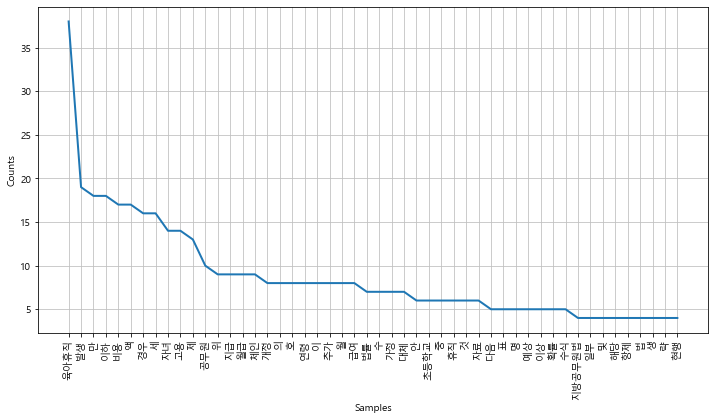

In [43]:
plt.figure(figsize=(12,6))
ko.plot(50)
plt.show()

In [47]:
#stop_words = ['.', '(, )', ',', "'", '%', '-', 'X', ').', 'x', '의', '자', '에',
#             '안', '번', '호', '을', '이', '다', '만', '로', '가', '를']
#ko = [each_word for each_word in ko if each_word not in stop_words]
#ko

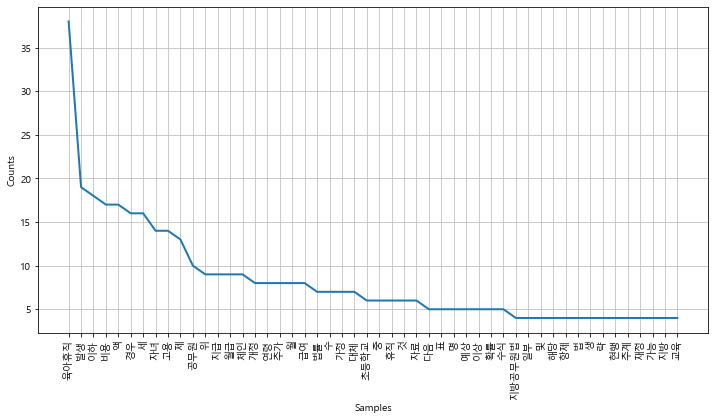

In [48]:
ko = nltk.Text(ko, name='대한민국 국회 의안 제 1809890호')

plt.figure(figsize=(12,6))
ko.plot(50)        # Plot sorted frequency of top 50 tokens
plt.show()

In [49]:
ko.count('초등학교')

6

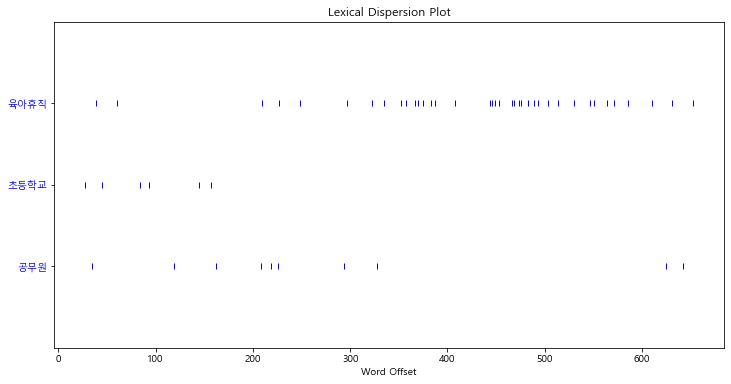

In [50]:
plt.figure(figsize=(12,6))
ko.dispersion_plot(['육아휴직', '초등학교', '공무원'])

In [51]:
ko.concordance('초등학교')

Displaying 6 of 6 matches:
 안규백 황영철 박영아 김정훈 김학송 의원 인 제안 이유 및 내용 초등학교 저학년 경우 부모 사랑 필요 나이 현재 공무원 자녀 양육 위 육아
 나이 현재 공무원 자녀 양육 위 육아휴직 수 자녀 나이 세 이하 초등학교 저학년 자녀 위 해당 부모님 일자리 곧 출산 의욕 저하 문제 수 
일부 개정 법률 지방공무원법 일부 다음 개정 제 항제 중 세 이하 초등학교 취학 전 자녀 세 이하 취학 중인 경우 초등학교 학년 이하 말 자
항제 중 세 이하 초등학교 취학 전 자녀 세 이하 취학 중인 경우 초등학교 학년 이하 말 자녀 부 칙 법 공포 날 시행 신 구조 문대비 표 
 수 다만 제 경우 대통령령 정 사정 직 명 생 략 현행 세 이하 초등학교 취 세 이하 취학 중인 경우 학 전 자녀 양육 위 초등학교 학년 
 이하 초등학교 취 세 이하 취학 중인 경우 학 전 자녀 양육 위 초등학교 학년 이하 여 여자 공무원 말 자녀 임신 출산 때 생 략 생 략 


In [54]:
ko.collocations()

초등학교 저학년; 근로자 육아휴직; 육아휴직 대상자; 공무원 육아휴직


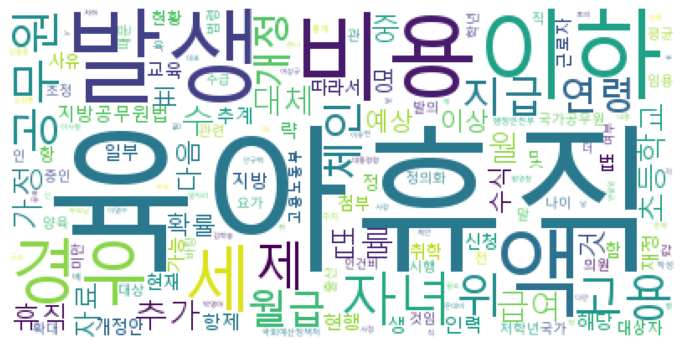

In [55]:
data = ko.vocab().most_common(150)

wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                     relative_scaling=0.2,
                     background_color='white').generate_from_frequencies(dict(data))
plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Naive Bayes Classifier의 이해 - 영문

In [56]:
from nltk.tokenize import word_tokenize
import nltk

In [57]:
train = [('i like you', 'pos'),
        ('i hate you', 'neg'),
        ('you like me', 'neg'),
        ('i like her', 'pos')]

In [59]:
all_words = set(word.lower() for sentence in train 
               for word in word_tokenize(sentence[0]))
all_words

{'hate', 'her', 'i', 'like', 'me', 'you'}

In [61]:
#t = [({word: (word in word_tokenize(x[0])) for word in all_words}, x[1])
#    for x in train]
#t

In [62]:
classifier = nltk.NaiveBayesClassifier.train(t)
classifier.show_most_informative_features()

Most Informative Features
                    hate = False             pos : neg    =      1.7 : 1.0
                     her = False             neg : pos    =      1.7 : 1.0
                       i = True              pos : neg    =      1.7 : 1.0
                    like = True              pos : neg    =      1.7 : 1.0
                      me = False             pos : neg    =      1.7 : 1.0
                     you = True              neg : pos    =      1.7 : 1.0


In [64]:
test_sentence = 'i like MeRui'
test_sent_features = {word.lower():
                     (word in word_tokenize(test_sentence.lower()))
                     for word in all_words}
test_sent_features

{'like': True,
 'i': True,
 'me': False,
 'hate': False,
 'you': False,
 'her': False}

In [66]:
classifier.classify(test_sent_features)

'pos'

# Naive Bayes Classifier의 이해 - 한글

In [70]:
from konlpy.tag import Okt

In [71]:
pos_tagger = Okt()

In [72]:
train = [('메리가 좋아', 'pos'),
        ('고양이도 좋아', 'pos'),
        ('난 수업이 지루해', 'neg'),
        ('메리는 이쁜 고양이야', 'pos'),
        ('난 마치고 메리랑 놀거야', 'pos')]

In [74]:
all_words = set(word.lower() for sentence in train
               for word in word_tokenize(sentence[0]))
all_words

{'고양이도',
 '고양이야',
 '난',
 '놀거야',
 '마치고',
 '메리가',
 '메리는',
 '메리랑',
 '수업이',
 '이쁜',
 '좋아',
 '지루해'}

In [76]:
#t = [({word: (word in word_tokenize(x[0])) for word in all_words}, x[1])
#    for x in train]
#t

In [77]:
classifier = nltk.NaiveBayesClassifier.train(t)
classifier.show_most_informative_features()

Most Informative Features
                       난 = True              neg : pos    =      2.5 : 1.0
                      좋아 = False             neg : pos    =      1.5 : 1.0
                    고양이도 = False             neg : pos    =      1.1 : 1.0
                    고양이야 = False             neg : pos    =      1.1 : 1.0
                     놀거야 = False             neg : pos    =      1.1 : 1.0
                     마치고 = False             neg : pos    =      1.1 : 1.0
                     메리가 = False             neg : pos    =      1.1 : 1.0
                     메리는 = False             neg : pos    =      1.1 : 1.0
                     메리랑 = False             neg : pos    =      1.1 : 1.0
                      이쁜 = False             neg : pos    =      1.1 : 1.0


In [78]:
test_sentence = '난 수업이 마치면 메리랑 놀거야'

In [79]:
test_sent_features = {word.lower():
                     (word in word_tokenize(test_sentence.lower()))
                     for word in all_words}
test_sent_features

{'메리는': False,
 '난': True,
 '이쁜': False,
 '메리랑': True,
 '메리가': False,
 '고양이도': False,
 '놀거야': True,
 '지루해': False,
 '좋아': False,
 '수업이': True,
 '고양이야': False,
 '마치고': False}

In [80]:
classifier.classify(test_sent_features)

'neg'

In [81]:
def tokenize(doc):
    return ['/'.join(t) for t in pos_tagger.pos(doc, norm=True, stem=True)]

In [82]:
train_docs = [(tokenize(row[0]), row[1]) for row in train]
train_docs

[(['메리/Noun', '가/Josa', '좋다/Adjective'], 'pos'),
 (['고양이/Noun', '도/Josa', '좋다/Adjective'], 'pos'),
 (['난/Noun', '수업/Noun', '이/Josa', '지루하다/Adjective'], 'neg'),
 (['메리/Noun', '는/Josa', '이쁘다/Adjective', '고양이/Noun', '야/Josa'], 'pos'),
 (['난/Noun', '마치/Noun', '고/Josa', '메리/Noun', '랑/Josa', '놀다/Verb'], 'pos')]

In [84]:
#tokens = [t for d in train_docs for t in d[0]]
#tokens

In [85]:
def term_exists(doc):
    return {word: (word in set(doc)) for word in tokens}

In [89]:
#train_xy = [(term_exists(d), c) for d,c in train_docs]
#train_xy

In [90]:
classifier = nltk.NaiveBayesClassifier.train(train_xy)

In [91]:
test_sentence = [('난 수업이 마치면 메리랑 놀거야')]

In [92]:
test_docs = pos_tagger.pos(test_sentence[0])
test_docs

[('난', 'Noun'),
 ('수업', 'Noun'),
 ('이', 'Josa'),
 ('마치', 'Noun'),
 ('면', 'Josa'),
 ('메리', 'Noun'),
 ('랑', 'Josa'),
 ('놀거야', 'Verb')]

In [93]:
classifier.show_most_informative_features()

Most Informative Features
                  난/Noun = True              neg : pos    =      2.5 : 1.0
                 메리/Noun = False             neg : pos    =      2.5 : 1.0
                고양이/Noun = False             neg : pos    =      1.5 : 1.0
            좋다/Adjective = False             neg : pos    =      1.5 : 1.0
                  가/Josa = False             neg : pos    =      1.1 : 1.0
                  고/Josa = False             neg : pos    =      1.1 : 1.0
                 놀다/Verb = False             neg : pos    =      1.1 : 1.0
                  는/Josa = False             neg : pos    =      1.1 : 1.0
                  도/Josa = False             neg : pos    =      1.1 : 1.0
                  랑/Josa = False             neg : pos    =      1.1 : 1.0


In [94]:
test_sent_features = {word: (word in tokens) for word in test_docs}
test_sent_features

{('난', 'Noun'): False,
 ('수업', 'Noun'): False,
 ('이', 'Josa'): False,
 ('마치', 'Noun'): False,
 ('면', 'Josa'): False,
 ('메리', 'Noun'): False,
 ('랑', 'Josa'): False,
 ('놀거야', 'Verb'): False}

In [95]:
classifier.classify(test_sent_features)

'pos'

# 문장의 유사도 측정

In [96]:
from sklearn.feature_extraction.text import CountVectorizer

In [97]:
vectorizer = CountVectorizer(min_df = 1)

In [98]:
contents = ['메리랑 놀러가고 싶지만 바쁜데 어떻하죠?',
           '메리는 공원에서 산책하고 노는 것을 싫어해요',
           '메리는 공원에서 노는 것도 싫어해요. 이상해요.',
           '먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 그러질 못하고 있어요']

In [99]:
X = vectorizer.fit_transform(contents)
vectorizer.get_feature_names()

['것도',
 '것을',
 '곳으로',
 '공원에서',
 '그러질',
 '너무',
 '노는',
 '놀러가고',
 '떠나고',
 '메리는',
 '메리랑',
 '못하고',
 '바빠서',
 '바쁜데',
 '산책하고',
 '싫어해요',
 '싶은데',
 '싶지만',
 '어떻하죠',
 '여행을',
 '이상해요',
 '있어요']

In [103]:
#X.toarray().transpose()

In [104]:
X = vectorizer.fit_transform(contents)
num_samples, num_features = X.shape
num_samples, num_features

(4, 22)

In [105]:
new_post = ['메리랑 공원에서 산책하고 놀고 싶어요']
new_post_vec = vectorizer.transform(new_post)
new_post_vec.toarray()

array([[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]],
      dtype=int64)

In [106]:
import scipy as sp

def dist_raw(v1, v2):
    delta = v1 - v2
    return sp.linalg.norm(delta.toarray())

In [107]:
best_doc = None
best_dist = 65535
best_i = None

for i in range(0, num_samples):
    post_vec = X.getrow(i)
    d = dist_raw(post_vec, new_post_vec)
    
    print('== Post %i with dist=%.2f   : %s' %(i,d,contents[i]))
    
    if d < best_dist:
        best_dist = d
        best_i = i

== Post 0 with dist=2.45   : 메리랑 놀러가고 싶지만 바쁜데 어떻하죠?
== Post 1 with dist=2.24   : 메리는 공원에서 산책하고 노는 것을 싫어해요
== Post 2 with dist=2.65   : 메리는 공원에서 노는 것도 싫어해요. 이상해요.
== Post 3 with dist=3.46   : 먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 그러질 못하고 있어요


In [109]:
from konlpy.tag import Okt
t = Okt()

In [116]:
#contents_tokens = [t.morphs(row) for row in contents]
#contents_tokens

In [112]:
contents_for_vectorize = []

for content in contents_tokens:
    sentence = ''
    for word in content:
        sentence = sentence + ' ' + word
        
    contents_for_vectorize.append(sentence)
    
contents_for_vectorize

[' 메리 랑 놀러 가고 싶지만 바쁜데 어떻하죠 ?',
 ' 메리 는 공원 에서 산책 하고 노 는 것 을 싫어해요',
 ' 메리 는 공원 에서 노 는 것 도 싫어해요 . 이상해요 .',
 ' 먼 곳 으로 여행 을 떠나고 싶은데 너무 바빠서 그러질 못 하고 있어요']

In [113]:
X = vectorizer.fit_transform(contents_for_vectorize)
num_samples, num_features = X.shape
num_samples, num_features

(4, 20)

In [114]:
vectorizer.get_feature_names()

['가고',
 '공원',
 '그러질',
 '너무',
 '놀러',
 '떠나고',
 '메리',
 '바빠서',
 '바쁜데',
 '산책',
 '싫어해요',
 '싶은데',
 '싶지만',
 '어떻하죠',
 '에서',
 '여행',
 '으로',
 '이상해요',
 '있어요',
 '하고']

In [117]:
X.toarray().transpose()

array([[1, 0, 0, 0],
       [0, 1, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [1, 1, 1, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 1, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [0, 1, 0, 1]], dtype=int64)

In [118]:
new_post = ['메리랑 공원에서 산책하고 놀고 싶어요']
new_post_tokens = [t.morphs(row) for row in new_post]

new_post_for_vectorize = []

for content in new_post_tokens:
    sentence = ''
    for word in content:
        sentence = sentence + ' ' + word
        
    new_post_for_vectorize.append(sentence)
    
new_post_for_vectorize

[' 메리 랑 공원 에서 산책 하고 놀고 싶어요']

In [119]:
new_post_vec = vectorizer.transform(new_post_for_vectorize)

In [121]:
new_post_vec.toarray()

array([[0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1]],
      dtype=int64)

In [122]:
import scipy as sp

def dist_raw(v1, v2):
    delta = v1 - v2
    return sp.linalg.norm(delta.toarray())

In [123]:
best_doc = None
best_dist = 65535
best_i = None

for i in range(0, num_samples):
    post_vec = X.getrow(i)
    d = dist_raw(post_vec, new_post_vec)
    
    print('== Post %i with dist=%.2f    : %s' % (i,d,contents[i]))
    
    if d < best_dist:
        best_dist = d
        best_i = i

== Post 0 with dist=3.00    : 메리랑 놀러가고 싶지만 바쁜데 어떻하죠?
== Post 1 with dist=1.00    : 메리는 공원에서 산책하고 노는 것을 싫어해요
== Post 2 with dist=2.00    : 메리는 공원에서 노는 것도 싫어해요. 이상해요.
== Post 3 with dist=3.46    : 먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 그러질 못하고 있어요


In [124]:
print('Best post is %i, dist = %.2f' % (best_i, best_dist))
print('-->', new_post)
print('---->', contents[best_i])

Best post is 1, dist = 1.00
--> ['메리랑 공원에서 산책하고 놀고 싶어요']
----> 메리는 공원에서 산책하고 노는 것을 싫어해요


In [125]:
for i in range(0, len(contents)):
    print(X.getrow(i).toarray())
    
print('----------------------')
print(new_post_vec.toarray())

[[1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0]]
[[0 1 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1]]
[[0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0]]
[[0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 1 1 0 1 1]]
----------------------
[[0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1]]


In [126]:
def dist_norm(v1, v2):
    v1_normalized = v1 / sp.linalg.norm(v1.toarray())
    v2_normalized = v2 / sp.linalg.norm(v2.toarray())
    
    delta = v1_normalized - v2_normalized
    
    return sp.linalg.norm(delta.toarray())

In [127]:
best_doc = None
best_dist = 65535
best_i = None

for i in range(0, num_samples):
    post_vec = X.getrow(i)
    d = dist_norm(post_vec, new_post_vec)
    
    print('== Post %i with dist=%.2f    : %s' %(i,d,contents[i]))
    
    if d < best_dist:
        best_dist = d
        best_i = i

== Post 0 with dist=1.28    : 메리랑 놀러가고 싶지만 바쁜데 어떻하죠?
== Post 1 with dist=0.42    : 메리는 공원에서 산책하고 노는 것을 싫어해요
== Post 2 with dist=0.89    : 메리는 공원에서 노는 것도 싫어해요. 이상해요.
== Post 3 with dist=1.30    : 먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 그러질 못하고 있어요


In [128]:
print('Best post is %i, dist = %.2f' % (best_i, best_dist))
print('-->', new_post)
print('---->', contents[best_i])

Best post is 1, dist = 0.42
--> ['메리랑 공원에서 산책하고 놀고 싶어요']
----> 메리는 공원에서 산책하고 노는 것을 싫어해요


In [129]:
def tfidf(t, d, D):
    tf = float(d.count(t)) / sum(d.count(w) for w in set(d))
    idf = sp.log(float(len(D))/(len([doc for doc in D if t in doc])))
    return tf, idf

In [130]:
a, abb, abc = ['a'], ['a','b','b'], ['a','b','c']
D = [a,abb,abc]

print(tfidf('a', a, D))
print(tfidf('b', abb, D))
print(tfidf('a', abc, D))
print(tfidf('b', abc, D))
print(tfidf('c', abc, D))

(1.0, 0.0)
(0.6666666666666666, 0.4054651081081644)
(0.3333333333333333, 0.0)
(0.3333333333333333, 0.4054651081081644)
(0.3333333333333333, 1.0986122886681098)


<ipython-input-129-4d78870261ea>:3: DeprecationWarning: scipy.log is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log instead
  idf = sp.log(float(len(D))/(len([doc for doc in D if t in doc])))


In [131]:
def tfidf(t, d, D):
    tf = float(d.count(t)) / sum(d.count(w) for w in set(d))
    idf = sp.log(float(len(D))/(len([doc for doc in D if t in doc])))
    return tf*idf

In [132]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=1, decode_error='ignore')

In [133]:
contents_tokens = [t.morphs(row) for row in contents]

contents_for_vectorize = []

for content in contents_tokens:
    sentence = ''
    for word in content:
        sentence = sentence + ' ' + word
        
    contents_for_vectorize.append(sentence)
    
X = vectorizer.fit_transform(contents_for_vectorize)
num_samples, num_features = X.shape
num_samples, num_features

(4, 20)

In [135]:
#vectorizer.get_feature_names()

In [136]:
new_post = ['근처 공원에 메리랑 놀러가고 싶네요.']
new_post_tokens = [t.morphs(row) for row in new_post]

new_post_for_vectorize = []

for content in new_post_tokens:
    sentence = ''
    for word in content:
        sentence = sentence + ' ' + word
        
    new_post_for_vectorize.append(sentence)
    
new_post_for_vectorize

[' 근처 공원 에 메리 랑 놀러 가고 싶네요 .']

In [137]:
new_post_vec = vectorizer.transform(new_post_for_vectorize)

In [138]:
best_doc = None
best_dist = 65535
best_i = None

for i in range(0, num_samples):
    post_vec = X.getrow(i)
    d = dist_norm(post_vec, new_post_vec)
    
    print('== Post %i with dist=%.2f    : %s' %(i,d,contents[i]))
    
    if d < best_dist:
        best_dist = d
        best_i = i
        
print('Best post is %i, dist = %.2f' % (best_i, best_dist))
print('-->', new_post)
print('---->', contents[best_i])

== Post 0 with dist=0.90    : 메리랑 놀러가고 싶지만 바쁜데 어떻하죠?
== Post 1 with dist=1.18    : 메리는 공원에서 산책하고 노는 것을 싫어해요
== Post 2 with dist=1.16    : 메리는 공원에서 노는 것도 싫어해요. 이상해요.
== Post 3 with dist=1.41    : 먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 그러질 못하고 있어요
Best post is 0, dist = 0.90
--> ['근처 공원에 메리랑 놀러가고 싶네요.']
----> 메리랑 놀러가고 싶지만 바쁜데 어떻하죠?


# 여자 친구 선물 고르기

In [140]:
import pandas as pd
import numpy as np

import platform
import matplotlib.pyplot as plt

%matplotlib inline

path = 'c:/Windows/Fonts/malgun.ttf'
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')
    
from bs4 import BeautifulSoup
import requests
import urllib
import time

In [152]:
tmp1 = 'https://search.naver.com/search.naver?where=kin'
html = tmp1 + '&sm=tab_jum&ie=utf8&query={key_word}&start={num}'

param = {
    'where' : 'post',
    'query' : '여친 선물',
    'start' : '1'
}

headers = {'User-Agent' : 'Mozilla/5.0'}

In [178]:
response = requests.get(html.format(num=1, key_word=urllib.parse.quote('여친 선물')))
response

<Response [200]>

In [180]:
#soup = BeautifulSoup(response.text, 'html.parser')

#soup

In [184]:
#tmp = soup.find_all('div')
#tmp

In [186]:
#tmp_list = []
#for line in tmp:
#    tmp_list.append(line.text)
    
#tmp_list

In [187]:
from tqdm import tqdm_notebook

present_candi_text = []

for n in tqdm_notebook(range(1, 1000, 10)):
    response = requests.get(html.format(num=1, key_word=urllib.parse.quote('여친 선물')))
    
    soup = BeautifulSoup(response.text, 'html.parser')
    
    tmp = soup.find_all('div')
    
    for line in tmp:
        present_candi_text.append(line.text)
        
    time.sleep(0.5)

<ipython-input-187-6debf557aab7>:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for n in tqdm_notebook(range(1, 1000, 10)):


  0%|          | 0/100 [00:00<?, ?it/s]

In [189]:
#present_candi_text

In [190]:
len(present_candi_text)

45300

In [164]:
import nltk
from konlpy.tag import Okt; t = Okt()

In [191]:
present_text = ''

for each_line in present_candi_text[:10000]:
    present_text = present_text + each_line + '\n'

In [193]:
#tokens_ko = t.morphs(present_text)
#tokens_ko

In [194]:
ko = nltk.Text(tokens_ko, name='여자 친구 선물')
print(len(ko.tokens))
print(len(set(ko.tokens)))

795058
1720


In [196]:
#ko = nltk.Text(tokens_ko, name='여자 친구 선물')
#ko.vocab().most_common(100)

In [176]:
ko.similar('여자친구')

No matches


In [203]:
stop_words = ['.','_','(','"','=','{',')','var',':',',',';','function','@','이','}',
             '에','1','Keep','()','":','Q','+','요','로','",','\n\n\n','가','/*',
             '="','*/','-','if','\n\n\n\n','require','을','의',');','("','e','은',
             '\n','?','k','});','window','>','common','div','\n      ','<','@@','A',
             '1:1','는','return','이전','다음','class','중','\n\n','[','@txt','t',
             '),','js','();','****','cr','data','으로','option','},','\n  ']

tokens_ko = [each_word for each_word in tokens_ko
            if each_word not in stop_words]

ko = nltk.Text(tokens_ko, name='여자 친구 선물')
ko.vocab().most_common(14)

[('선물', 10886),
 ('상담', 10845),
 ('여친', 8250),
 ('저장', 4744),
 ('별', 3680),
 ('추천', 3318),
 ('MBTI', 2893),
 ('점', 2870),
 ('자동', 2523),
 ('바로가기', 2490),
 ('가능', 2430),
 ('완성', 2293),
 ('보기', 2136),
 ('팔찌', 1814)]

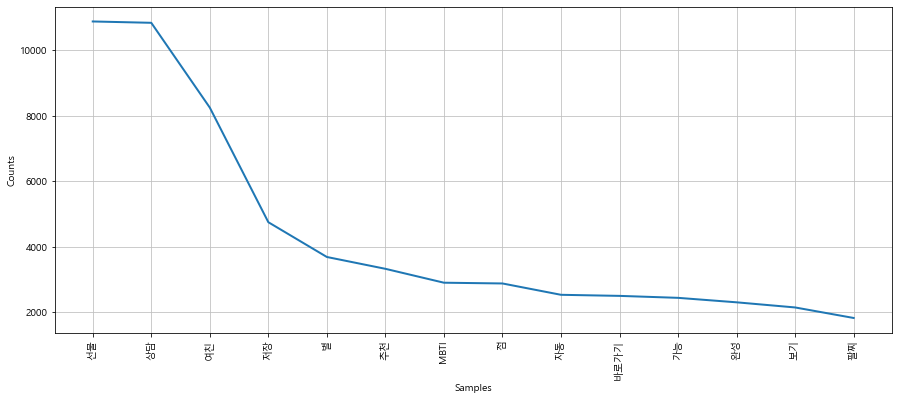

In [204]:
plt.figure(figsize=(15,6))
ko.plot(14)
plt.show()

In [205]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

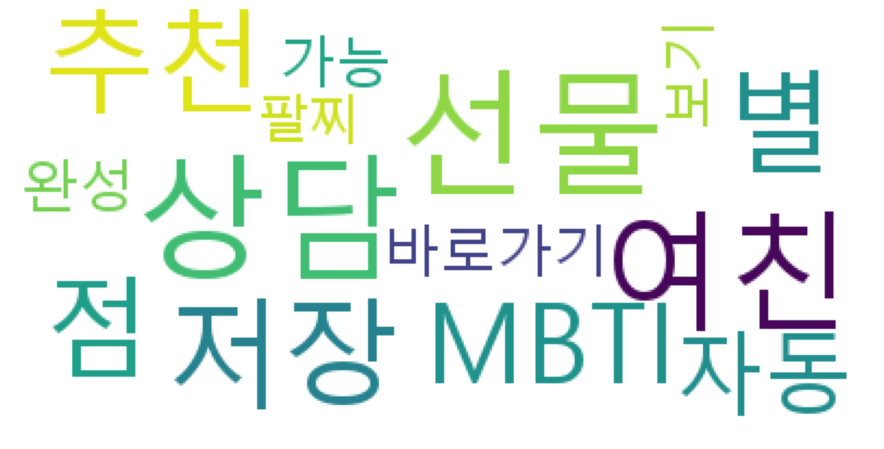

In [206]:
data = ko.vocab().most_common(14)

wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                     relative_scaling=0.2,
                     #stopwords=STOPWORDS,
                     background_color='white').generate_from_frequencies(dict(data))
plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [207]:
mask = np.array(Image.open('./data/NLP_data/09. heart.jpg'))

from wordcloud import ImageColorGenerator

image_colors = ImageColorGenerator(mask)

In [208]:
data = ko.vocab().most_common(14)

wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                     relative_scaling=0.2, mask=mask,
                     #stopwords=STOPWORDS,
                     background_color='white',
                     min_font_size=1,
                     max_font_size=100).generate_from_frequencies(dict(data))

default_colors = wordcloud.to_array()

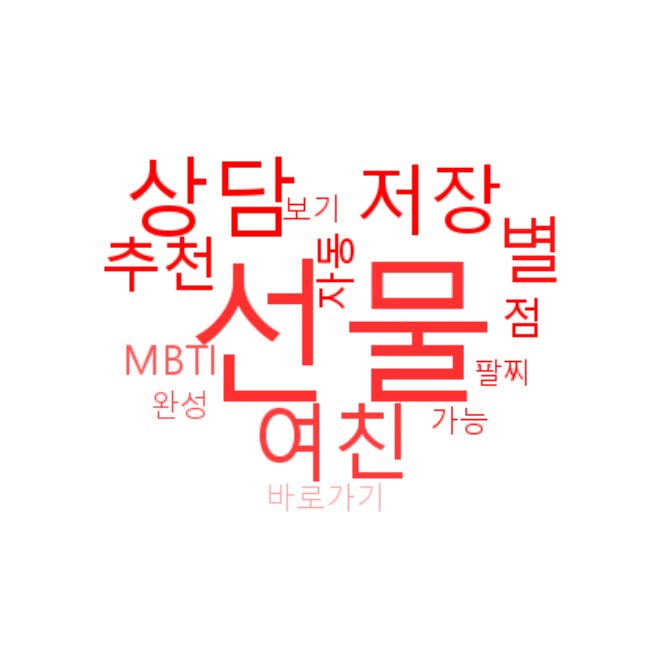

In [209]:
plt.figure(figsize=(12,12))
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off')
plt.show()

In [211]:
import gensim
from gensim.models import word2vec

C:\Users\bitcamp\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [215]:
#okt = Okt()
#results = []
#lines = present_candi_text

#for line in lines:
#    malist = okt.pos(line, norm=True, stem=True)
#    r = []
    
#    for word in malist:
#        if not word[1] in ['Josa', 'Eomi', 'Punctuation']:
#            r.append(word[0])
            
#    r1 = (' '.join(r)).strip()
#    results.append(r1)
#    print(r1)

In [214]:
data_file = './data/NLP_data/pres_girl.data'
with open(data_file, 'w', encoding='utf-8') as fp:
    fp.write('\n'.join(results))

In [216]:
data = word2vec.LineSentence(data_file)
data

In [217]:
model = word2vec.Word2Vec(data, window=10, hs=1, min_count=2, sg=1)
model.save('./data/NLP_data/pres_girl.model')

In [218]:
model = word2vec.Word2Vec.load('./data/NLP_data/pres_girl.model')
model.wv.vectors.shape

(1385, 100)

In [219]:
model.wv.most_similar(positive=['선물'])

[('여친', 0.8000725507736206),
 ('기념일', 0.5155763030052185),
 ('30', 0.4798898994922638),
 ('추천', 0.465654194355011),
 ('중', 0.4619431793689728),
 ('주다', 0.45261648297309875),
 ('아니다', 0.43723970651626587),
 ('고민', 0.4329177737236023),
 ('좀', 0.421520471572876),
 ('Q', 0.4186466336250305)]

In [220]:
model.wv.most_similar(positive=['여자친구'])

[('여자', 0.4728878140449524),
 ('대다', 0.4532463848590851),
 ('추천', 0.4357060492038727),
 ('A', 0.4232644736766815),
 ('선물', 0.4136403203010559),
 ('아주', 0.3993607461452484),
 ('안녕하다', 0.395209938287735),
 ('딱', 0.39444950222969055),
 ('크로노스', 0.3896515667438507),
 ('드릴', 0.3894071578979492)]